<a href="https://colab.research.google.com/github/Mekhala17/dl-transferlearning/blob/main/Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dog vs Cat Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls

drive  sample_data


In [5]:
from zipfile import ZipFile

zip_path = "/content/drive/MyDrive/dogs-vs-cats.zip"
extract_path = "/content/drive/MyDrive/dog vs cat"

with ZipFile(zip_path, 'r') as zip:
    zip.extractall(extract_path)

print("Dataset extracted INSIDE Google Drive ✅")

Dataset extracted INSIDE Google Drive ✅


In [6]:
from zipfile import ZipFile

dataset = "/content/drive/MyDrive/dog vs cat/train.zip"
extract_to = "/content/drive/MyDrive/dog vs cat"

with ZipFile(dataset, 'r') as zip:
    zip.extractall(extract_to)
    print("The dataset is extracted and SAVED in Drive ✅")


KeyboardInterrupt: 

In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/drive/MyDrive/dog vs cat/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [8]:
file_names = os.listdir('/content/drive/MyDrive/dog vs cat/train/')
print(file_names)

['dog.9099.jpg', 'dog.91.jpg', 'dog.910.jpg', 'dog.9100.jpg', 'dog.9101.jpg', 'dog.9102.jpg', 'dog.9103.jpg', 'dog.9104.jpg', 'dog.9105.jpg', 'dog.9106.jpg', 'dog.9107.jpg', 'dog.9108.jpg', 'dog.9109.jpg', 'dog.911.jpg', 'dog.9110.jpg', 'dog.9111.jpg', 'dog.9112.jpg', 'dog.9113.jpg', 'dog.9114.jpg', 'dog.9115.jpg', 'dog.9116.jpg', 'dog.9117.jpg', 'dog.9118.jpg', 'dog.9119.jpg', 'dog.912.jpg', 'dog.9120.jpg', 'dog.9121.jpg', 'dog.9122.jpg', 'dog.9123.jpg', 'dog.9124.jpg', 'dog.9125.jpg', 'dog.9126.jpg', 'dog.9127.jpg', 'dog.9128.jpg', 'dog.9129.jpg', 'dog.913.jpg', 'dog.9130.jpg', 'dog.9131.jpg', 'dog.9132.jpg', 'dog.9133.jpg', 'dog.9134.jpg', 'dog.9135.jpg', 'dog.9136.jpg', 'dog.9137.jpg', 'dog.9138.jpg', 'dog.9139.jpg', 'dog.914.jpg', 'dog.9140.jpg', 'dog.9141.jpg', 'dog.9142.jpg', 'dog.9143.jpg', 'dog.9144.jpg', 'dog.9145.jpg', 'dog.9146.jpg', 'dog.9147.jpg', 'dog.9148.jpg', 'dog.9149.jpg', 'dog.915.jpg', 'dog.9150.jpg', 'dog.9151.jpg', 'dog.9152.jpg', 'dog.9153.jpg', 'dog.9154.jpg',

Importing the Dependencies

In [56]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

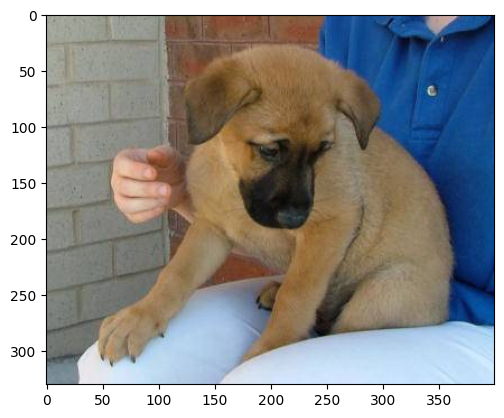

In [57]:
# display dog image
img = mpimg.imread('/content/drive/MyDrive/dog vs cat/train/dog.8299.jpg')
imgplt = plt.imshow(img)
plt.show()

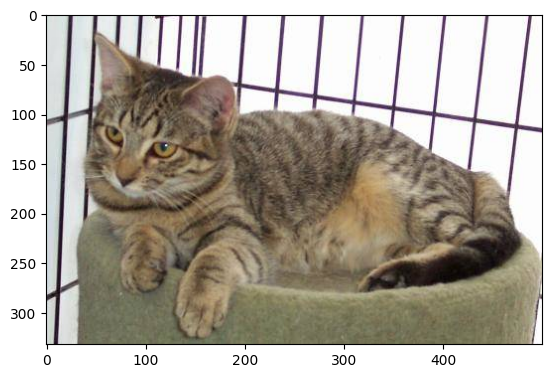

In [58]:
# display cat image
img = mpimg.imread('/content/drive/MyDrive/dog vs cat/train/cat.9903.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/drive/MyDrive/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
dog
dog
dog
dog


In [13]:
file_names = os.listdir('/content/drive/MyDrive/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [4]:
#creating a directory for resized images
import os
os.mkdir('/content/image resized')

In [17]:
import os
from PIL import Image

original_folder = '/content/drive/MyDrive/train/'
resized_folder = '/content/image_resized/'   # no space

os.makedirs(resized_folder, exist_ok=True)

# List all original files ONCE
all_files = os.listdir(original_folder)

# Separate cats and dogs
cat_files = [f for f in all_files if f.startswith('cat')]
dog_files = [f for f in all_files if f.startswith('dog')]

# Number you want from each class
NUM_PER_CLASS = 1000

cat_files = cat_files[:NUM_PER_CLASS]
dog_files = dog_files[:NUM_PER_CLASS]

selected_files = cat_files + dog_files

# Files already resized (to avoid duplicates)
already_resized = set(os.listdir(resized_folder))

for filename in selected_files:
    if filename in already_resized:
        continue  # skip already processed images

    img_path = os.path.join(original_folder, filename)

    with Image.open(img_path) as img:
        img = img.convert('RGB')
        img = img.resize((224, 224))
        img.save(os.path.join(resized_folder, filename))

print("✅ Resizing complete!")



✅ Resizing complete!


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

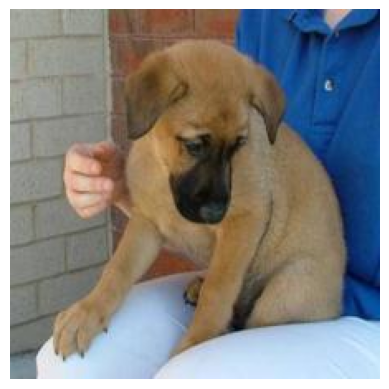

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/image_resized/dog.8299.jpg')
plt.imshow(img)
plt.axis('off')


In [23]:
files = os.listdir(original_folder)[:20]
print(files)


NameError: name 'os' is not defined

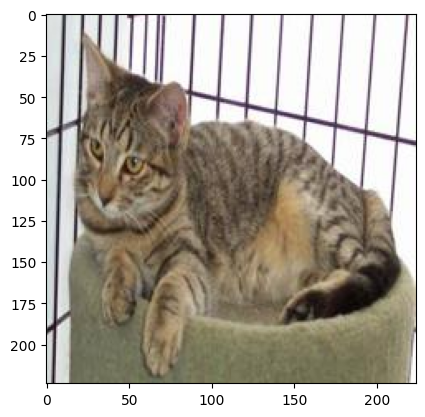

In [24]:
# display resized cat image
img = mpimg.imread('/content/image_resized/cat.9903.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [5]:
# creaing a for loop to assign labels
import os
filenames = os.listdir('/content/image_resized')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [6]:
print(filenames[0:5])
print(len(filenames))

['dog.9108.jpg', 'dog.9627.jpg', 'dog.9594.jpg', 'dog.9757.jpg', 'dog.8854.jpg']
3000


In [7]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 1, 1]
2000


In [8]:
# counting the images of dogs and cats out of 2000 images
import numpy as np
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 675 1325]


Converting all the resized images to numpy arrays

In [9]:
import cv2
import glob

In [10]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [11]:
print(dog_cat_images)

[[[[188 185 180]
   [189 186 181]
   [192 189 184]
   ...
   [199 207 220]
   [172 180 193]
   [126 134 147]]

  [[186 183 178]
   [187 184 179]
   [189 186 181]
   ...
   [201 209 222]
   [185 193 206]
   [127 135 148]]

  [[185 182 178]
   [186 183 179]
   [187 184 180]
   ...
   [197 205 218]
   [203 211 224]
   [132 140 153]]

  ...

  [[ 28  17  25]
   [ 28  17  25]
   [ 29  18  26]
   ...
   [147 157 174]
   [147 157 174]
   [146 156 173]]

  [[ 28  17  27]
   [ 27  16  26]
   [ 28  17  27]
   ...
   [147 157 174]
   [146 156 173]
   [145 155 172]]

  [[ 28  17  27]
   [ 27  16  26]
   [ 27  16  26]
   ...
   [147 157 174]
   [146 156 173]
   [144 154 171]]]


 [[[214 197 201]
   [214 197 201]
   [210 193 197]
   ...
   [167 141 134]
   [166 140 133]
   [165 139 132]]

  [[208 191 195]
   [212 195 199]
   [214 197 201]
   ...
   [168 142 135]
   [167 141 134]
   [166 140 133]]

  [[195 178 182]
   [205 188 192]
   [215 198 202]
   ...
   [167 141 134]
   [166 140 133]
   [165 139

In [12]:
type(dog_cat_images)

numpy.ndarray

In [13]:
print(dog_cat_images.shape)

(3000, 224, 224, 3)


In [14]:
X = dog_cat_images
Y = np.asarray(labels)

In [18]:
import os
import numpy as np
from PIL import Image

data_folder = '/content/image_resized/'

X = []
Y = []

files = os.listdir(data_folder)

for filename in files:
    img_path = os.path.join(data_folder, filename)

    with Image.open(img_path) as img:
        img = img.convert('RGB')
        img = img.resize((224, 224))
        X.append(np.array(img))

        if filename.startswith('cat'):
            Y.append(0)
        elif filename.startswith('dog'):
            Y.append(1)

X = np.array(X)
Y = np.array(Y)

print("Images:", X.shape)
print("Labels:", Y.shape)


Images: (3000, 224, 224, 3)
Labels: (3000,)


In [15]:
X = X / 255.0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2, stratify=Y
)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(2400, 224, 224, 3) (600, 224, 224, 3)
(2400,) (600,)


In [20]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(3000, 224, 224, 3) (2400, 224, 224, 3) (600, 224, 224, 3)


1600 --> training images

400 --> test images

In [22]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [23]:
print(X_train_scaled)

[[[[0.31372549 0.29803922 0.25098039]
   [0.23529412 0.21960784 0.17254902]
   [0.18039216 0.16470588 0.11764706]
   ...
   [0.15294118 0.14509804 0.08627451]
   [0.1372549  0.12941176 0.07843137]
   [0.1254902  0.11764706 0.06666667]]

  [[0.32941176 0.31372549 0.26666667]
   [0.29019608 0.2745098  0.22745098]
   [0.23137255 0.21568627 0.16862745]
   ...
   [0.16078431 0.15294118 0.09411765]
   [0.14509804 0.1372549  0.08627451]
   [0.13333333 0.1254902  0.0745098 ]]

  [[0.33333333 0.31764706 0.27058824]
   [0.34509804 0.32941176 0.28235294]
   [0.30196078 0.28627451 0.23921569]
   ...
   [0.16862745 0.16078431 0.10196078]
   [0.14901961 0.14117647 0.09019608]
   [0.1372549  0.12941176 0.07843137]]

  ...

  [[0.20392157 0.18823529 0.14117647]
   [0.20392157 0.18823529 0.14117647]
   [0.21176471 0.19607843 0.14901961]
   ...
   [0.45098039 0.43529412 0.39215686]
   [0.43921569 0.42352941 0.38039216]
   [0.43529412 0.41960784 0.37647059]]

  [[0.2        0.18823529 0.12941176]
   [0.2

**Building the Neural Network**

In [24]:
import tensorflow as tf
import tensorflow_hub as hub

In [5]:
!pip install --upgrade tensorflow-hub

In [6]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [25]:
import tensorflow as tf
import tensorflow_hub as hub

# ----------------------------
# Required definitions
# ----------------------------
mobilenet_model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
num_of_classes = 2

# ----------------------------
# Custom Hub Layer
# ----------------------------
class HubFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, hub_url, **kwargs):
        super().__init__(**kwargs)
        self.hub_url = hub_url
        self.hub_model = hub.load(self.hub_url)

    def call(self, inputs):
        inputs = tf.cast(inputs, tf.float32)
        return self.hub_model(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({"hub_url": self.hub_url})
        return config

# ----------------------------
# Model Definition
# ----------------------------
pretrained_model = HubFeatureExtractor(
    mobilenet_model_url,
    name='mobilenet_feature_extractor'
)

inputs = tf.keras.Input(shape=(224, 224, 3))
x = pretrained_model(inputs)
outputs = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_feature_extractor     │ (None, 1280)           │             0 │
│ (HubFeatureExtractor)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [29]:
model.fit(X_train, Y_train, batch_size=8, epochs=5)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


300/300 ━━━━━━━━━━━━━━━━━━━━ 98s 302ms/step - acc: 0.6533 - loss: 0.6594
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 147s 318ms/step - acc: 0.7183 - loss: 0.5331
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 125s 262ms/step - acc: 0.7628 - loss: 0.4916
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 80s 266ms/step - acc: 0.7791 - loss: 0.4651
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 76s 254ms/step - acc: 0.7929 - loss: 0.4496


In [30]:
import gc
gc.collect()

3259

In [31]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - acc: 0.4394 - loss: 1.2779
Test Loss = 1.2727738618850708
Test Accuracy = 0.46166667342185974


In [33]:
model.save('/content/dog_cat_model.keras')


**Predictive System**

In [51]:
from google.colab.patches import cv2_imshow

Path of the image to be predicted: /content/OIP.jpg


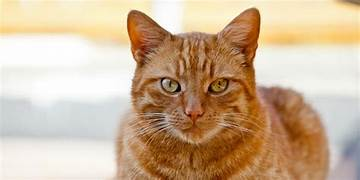

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
[[0.75605863 0.24394134]]
0
The image represents a Cat


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')